In [40]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline
import seaborn as sns

In [96]:
# Load data files
path1 = "Resources for Decades Analysis/1950.csv"
path2= "Resources for Decades Analysis/1960.csv"
path3= "Resources for Decades Analysis/1970.csv"
path4= "Resources for Decades Analysis/1980.csv"
path5= "Resources for Decades Analysis/1990.csv"
path6= "Resources for Decades Analysis/2000.csv"
path7= "Resources for Decades Analysis/2010.csv"


# Read the data 
data1 = pd.read_csv(path1)
data2 = pd.read_csv(path2)
data3 = pd.read_csv(path3)
data4 = pd.read_csv(path4)
data5 = pd.read_csv(path5)
data6 = pd.read_csv(path6)
data7 = pd.read_csv(path7)
#Visualizing data
data1.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


In [3]:
data2.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82
1,2,Come Together - Remastered 2009,The Beatles,british invasion,1969,165,38,53,-12,9,19,260,3,4,79
2,3,Sweet Caroline,Neil Diamond,adult standards,1969,63,13,53,-16,24,58,204,61,3,78
3,4,Yesterday - Remastered 2009,The Beatles,british invasion,1965,97,18,33,-12,9,32,126,88,3,78
4,5,Can't Help Falling in Love,Elvis Presley,adult standards,1961,100,29,40,-14,11,34,182,94,3,78


In [7]:
data_df1=pd.concat([data1,data2])
data_df1

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,A World Without Love,Peter And Gordon,brill building pop,2017,130,66,51,-10,11,75,161,23,6,37
93,94,Don't Break The Heart That Loves You,Connie Francis,adult standards,1996,73,41,39,-6,20,20,182,82,3,37
94,95,Live Wire,The Meters,afrobeat,1969,114,77,68,-12,17,96,160,27,4,36
95,96,Laugh Laugh,The Beau Brummels,brill building pop,2006,129,68,49,-9,10,75,177,30,5,30


In [8]:
data_df2=pd.concat([data_df1,data3])
data_df2

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,I Got Lucky,Elvis Presley,adult standards,1971,93,39,73,-12,20,96,116,84,4,49
100,101,Baretta's Theme,Sammy Davis Jr.,adult standards,2002,105,91,64,-8,28,69,146,35,6,48
101,102,One of These Days,Emmylou Harris,country rock,1975,125,39,66,-9,12,68,184,45,3,46
102,103,My Heart Belongs to Me,Barbra Streisand,adult standards,1977,139,21,27,-16,18,30,201,74,3,44


In [9]:
data_df3=pd.concat([data_df2,data4])
data_df3

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,Cold as Ice - 2008 Remaster,Foreigner,album rock,2008,131,71,55,-5,14,51,200,6,3,57
101,102,Zulu Nation Throw Down,Afrika Bambaataa,bronx hip hop,2015,108,95,85,-4,10,91,433,76,19,50
102,103,It's Only Love - 2008 Remaster,Simply Red,british soul,2008,92,88,67,-5,4,75,299,51,4,50
103,104,Lucky Star,Madonna,dance pop,1983,117,81,80,-5,22,93,338,20,4,46


In [10]:
data_df4=pd.concat([data_df3,data5])
data_df4

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4,50
84,85,If You Ever,East 17,boy band,1996,140,68,58,-9,31,57,255,18,3,48
85,86,Pump Up The Jam,Technotronic,eurodance,2019,125,84,89,-9,5,72,320,1,7,46
86,87,Doin' It,LL Cool J,east coast hip hop,1996,95,53,81,-12,12,62,294,34,19,46


In [11]:
data_df5=pd.concat([data_df4,data6])
data_df5

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,I Know What You Want (feat. Flipmode Squad),Busta Rhymes,east coast hip hop,2002,86,75,56,-4,64,49,324,1,32,56
96,97,Knock You Down,Keri Hilson,dance pop,2009,155,88,59,-5,17,65,326,1,16,56
97,98,Dragostea Din Tei - Italian Version,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3,44
98,99,What A Girl Wants - Eddie Arroyo Dance Radio Edit,Christina Aguilera,dance pop,1999,130,92,75,-7,7,66,244,1,3,40


In [12]:
data_df6=pd.concat([data_df5,data7])
data_df6

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
96,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43


In [75]:
#Dropping some columns that are not relevant for our objective
spotify_df1=data_df6.drop(columns=['Number','acous','dur',
                                     'live','spch'])
spotify_df1=spotify_df1.rename(columns={'top genre':"Genre",
                                        'title':'Title',
                                        'artist':'Artist',
                                       'bpm':'Beats/min',
                                       'nrgy':'Energy',
                                       'dnce':'Danceability',
                                       'dB':'Loudness',
                                       'val':'Valence',
                                        'pop':'Popularity'
                                       })
spotify_df1

,Title,Artist,Genre,year,Beats/min,Energy,Danceability,Loudness,Valence,Popularity
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,47,72
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,78,62
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,40,61
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,66,60
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,62,60
...,...,...,...,...,...,...,...,...,...,...
95,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,80,56
96,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,87,56
97,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,68,54
98,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,49,43


In [19]:
count_track_name=spotify_df1["Title"].value_counts()
count_track_name

Dynamite                              2
Please Mr. Postman                    2
Please Don't Go                       2
Hurts So Good                         2
Everybody Loves Somebody              2
                                     ..
Boulder to Birmingham - Remastered    1
Take A Bow                            1
Hate That I Love You                  1
Das Boot                              1
You Found Me                          1
Name: Title, Length: 656, dtype: int64

In [20]:
#counting tracks
count_artist=spotify_df1["Artist"].value_counts()
count_artist


Elton John          12
Queen               11
ABBA                 9
The Beatles          7
Barbra Streisand     6
                    ..
Four Tops            1
Afrika Bambaataa     1
Wamdue Project       1
BeyoncÃ©             1
Cascada              1
Name: Artist, Length: 469, dtype: int64

In [21]:
#Visualizing one of the duplicate entry
data_tracks=spotify_df1.set_index('Title')
duplicate_song=data_tracks.loc['Dynamite']
duplicate_song

,Artist,Genre,year,Beats/min,Energy,Danceability,dB,Valence,Popularity
Title,,,,,,,,,
Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,82,77
Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,87,56


In [76]:
correlation_df=spotify_df1.corr()
correlation_df

,year,Beats/min,Energy,Danceability,Loudness,Valence,Popularity
year,1.000000,-0.020790,0.195329,0.273865,0.422602,-0.087055,0.160467
Beats/min,-0.020790,1.000000,0.179329,-0.057710,0.044748,0.084723,0.066558
Energy,0.195329,0.179329,1.000000,0.331962,0.702543,0.405190,0.271798
Danceability,0.273865,-0.057710,0.331962,1.000000,0.295534,0.454714,0.249302
Loudness,0.422602,0.044748,0.702543,0.295534,1.000000,0.136813,0.365172
Valence,-0.087055,0.084723,0.405190,0.454714,0.136813,1.000000,-0.102418
Popularity,0.160467,0.066558,0.271798,0.249302,0.365172,-0.102418,1.000000


In [23]:
#Group by popularity  to sort out more
genres_popularity=pd.DataFrame(spotify_df1.groupby(['Genre'])['Popularity'].count())
genres_popularity_count=genres_popularity.rename(columns={'Popularity':'Count of Tracks',
                                                          'Genre':"Genre"})
genres_popularity_count=genres_popularity_count.sort_values("Count of Tracks", ascending=False)
genres_popularity_count

,Count of Tracks
Genre,
dance pop,114
adult standards,93
album rock,77
glam rock,23
brill building pop,20
...,...
britpop,1
british dance band,1
british comedy,1


In [29]:
len(spotify_df1['Genre'].unique())

116

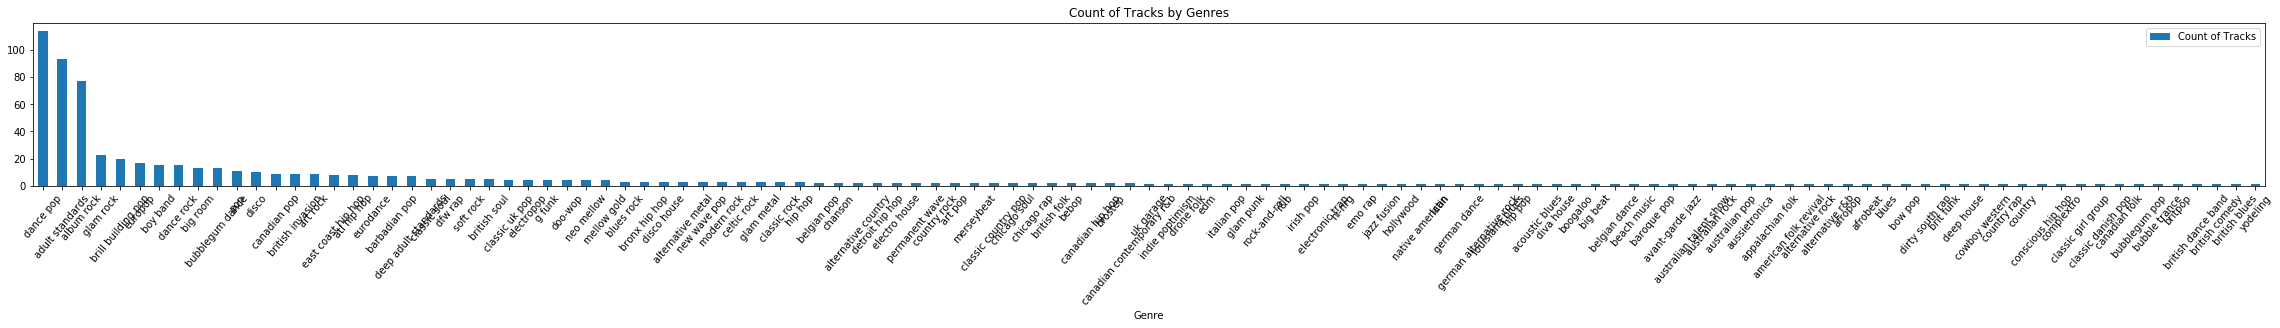

<Figure size 432x288 with 0 Axes>

In [26]:
# Use DataFrame.plot() in order to create a bar chart of the data
genres_popularity_count.plot(kind="bar",rot=50, figsize=(40,3))

# Set a title for the chart
plt.title("Count of Tracks by Genres")
plt.savefig("Images/Bar Chart of Option3.png")
plt.show()
plt.tight_layout()

In [77]:
#Calculating and listing average for music parameters for each genre
genre_df = spotify_df1.groupby(['Genre'])
max_score = pd.DataFrame(round(genre_df.max(),2))   
max_score1 = max_score.loc[:,['Popularity','Danceability','Energy','Beats/min','Loudness','Valence']]



max_score1=max_score1.reset_index()
max_score1

,Genre,Popularity,Danceability,Energy,Beats/min,Loudness,Valence
0,acoustic blues,55,54,50,174,-11,95
1,adult standards,78,81,97,182,-4,99
2,afrobeat,36,68,77,114,-12,96
3,afropop,38,34,43,119,-17,44
4,album rock,83,83,98,180,-3,97
...,...,...,...,...,...,...,...
110,r&b,79,73,73,118,-3,51
111,rock-and-roll,60,52,62,64,-6,64
112,soft rock,73,72,72,157,-5,83
113,uk garage,57,84,51,127,-11,52


In [78]:
#Sorting top 5 popular genres based on popularity
top_5 = max_score1.sort_values("Popularity", ascending=False)
top_5=top_5.set_index('Genre')
top_5.head(5)

,Popularity,Danceability,Energy,Beats/min,Loudness,Valence
Genre,,,,,,
electropop,94,70,71,135,-6,56
dance pop,90,96,94,168,-3,98
country rap,89,88,62,136,-6,64
canadian pop,88,87,87,148,-3,97
dfw rap,88,76,80,160,-4,93


In [79]:
#Sorting bottom 5 popular genres based on popularity
worst_5 = max_score1.sort_values("Popularity", ascending=True)
worst_5=worst_5.set_index('Genre')
worst_5.head(5)

,Popularity,Danceability,Energy,Beats/min,Loudness,Valence
Genre,,,,,,
australian talent show,30,42,73,199,-11,72
yodeling,31,69,19,102,-17,56
merseybeat,31,57,46,131,-9,89
british dance band,33,53,27,90,-8,72
afrobeat,36,68,77,114,-12,96


In [80]:
popularity_bins=max_score1.copy()
#Creating popularity bins

size_bins = [0, 40, 60, 80,90,100]

# Create labels for these bins
size_labels = ["Not Popular (< 40)", "A Little Popular (40-60)", "Likable But Not Popular (60-80)","Popular (80-90)","Most Popular (90-100)"]
popularity_bins["Popularity Size"]=pd.cut(max_score1["Popularity"], size_bins, labels=size_labels)
popularity_bins

,Genre,Popularity,Danceability,Energy,Beats/min,Loudness,Valence,Popularity Size
0,acoustic blues,55,54,50,174,-11,95,A Little Popular (40-60)
1,adult standards,78,81,97,182,-4,99,Likable But Not Popular (60-80)
2,afrobeat,36,68,77,114,-12,96,Not Popular (< 40)
3,afropop,38,34,43,119,-17,44,Not Popular (< 40)
4,album rock,83,83,98,180,-3,97,Popular (80-90)
...,...,...,...,...,...,...,...,...
110,r&b,79,73,73,118,-3,51,Likable But Not Popular (60-80)
111,rock-and-roll,60,52,62,64,-6,64,A Little Popular (40-60)
112,soft rock,73,72,72,157,-5,83,Likable But Not Popular (60-80)
113,uk garage,57,84,51,127,-11,52,A Little Popular (40-60)


In [81]:
#Visualizing data in bins
summary_by_popularity_size=popularity_bins.groupby(by="Popularity Size").mean()

summary_by_popularity_size

,Popularity,Danceability,Energy,Beats/min,Loudness,Valence
Popularity Size,,,,,,
Not Popular (< 40),34.125000,57.500000,45.625000,118.250000,-12.500000,69.500000
A Little Popular (40-60),51.900000,60.033333,58.166667,118.666667,-9.566667,59.966667
Likable But Not Popular (60-80),72.714286,69.553571,77.625000,135.464286,-6.053571,72.160714
Popular (80-90),84.350000,75.600000,79.350000,147.450000,-4.500000,67.250000
Most Popular (90-100),94.000000,70.000000,71.000000,135.000000,-6.000000,56.000000


In [82]:
#Group by year
year=spotify_df1.sort_values('year')
year


,Title,Artist,Genre,year,Beats/min,Energy,Danceability,Loudness,Valence,Popularity
12,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,33,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,78,62
72,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,85,26
24,Only Because,The Platters,adult standards,1957,73,28,55,-10,47,44
21,Chicago - Remastered,Frank Sinatra,adult standards,1958,148,46,51,-10,79,47
...,...,...,...,...,...,...,...,...,...,...
67,I Will Survive - Extended Version,Gloria Gaynor,disco,2019,116,85,76,-5,59,61
6,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,2019,90,52,76,-4,93,86
9,Last Christmas,Wham!,dance rock,2019,108,58,74,-9,94,78
58,When You Love Someone,James TW,neo mellow,2019,126,45,68,-6,35,76


In [83]:
#sorting by decades
decades_bins=year.copy()
#Creating popularity bins

size_bins = [1940, 1960, 1970, 1980,1990,2000,2010]

# Create labels for these bins
year_labels = ["1950-1960", "1960-1970", "1970-1980","1980-1990","1990-2000",'2000-2010']
decades_bins["Year Size"]=pd.cut(year["year"], size_bins, labels=year_labels)
decades_bins

,Title,Artist,Genre,year,Beats/min,Energy,Danceability,Loudness,Valence,Popularity,Year Size
12,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,33,52,1950-1960
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,78,62,1950-1960
72,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,85,26,1950-1960
24,Only Because,The Platters,adult standards,1957,73,28,55,-10,47,44,1950-1960
21,Chicago - Remastered,Frank Sinatra,adult standards,1958,148,46,51,-10,79,47,1950-1960
...,...,...,...,...,...,...,...,...,...,...,...
67,I Will Survive - Extended Version,Gloria Gaynor,disco,2019,116,85,76,-5,59,61,NaN
6,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,2019,90,52,76,-4,93,86,NaN
9,Last Christmas,Wham!,dance rock,2019,108,58,74,-9,94,78,NaN
58,When You Love Someone,James TW,neo mellow,2019,126,45,68,-6,35,76,NaN


In [84]:
#Visualizing data in bins
summary_by_year=decades_bins.groupby(by="Year Size").mean()
summary_by_year=summary_by_year.drop(columns=['year'])
summary_by_year=summary_by_year.reset_index()
summary_by_year

,Year Size,Beats/min,Energy,Danceability,Loudness,Valence,Popularity
0,1950-1960,97.500000,30.600000,45.700000,-11.600000,52.100000,46.600000
1,1960-1970,121.763889,52.083333,51.236111,-11.152778,59.208333,55.875000
2,1970-1980,121.043478,60.239130,56.304348,-9.358696,61.086957,65.630435
3,1980-1990,120.433735,60.421687,60.204819,-9.963855,58.939759,66.228916
4,1990-2000,119.472222,62.342593,61.314815,-8.555556,56.027778,61.694444
5,2000-2010,119.492754,67.311594,66.130435,-6.637681,60.637681,63.927536


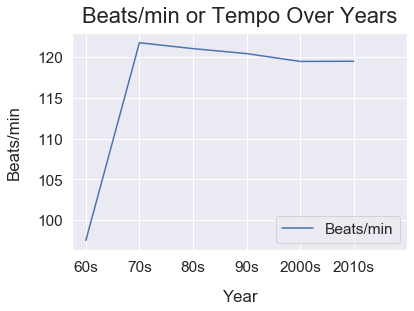

In [95]:
#Creating a line graph for year vs.  beats/min

summary_by_year.plot.line(x="Year Size", y='Beats/min');
plt.xlabel("Year", labelpad=15)
plt.ylabel("Beats/min", labelpad=15)
plt.title("Beats/min or Tempo Over Years", y=1.02, fontsize=22);
plt.xticks(np.arange(7), ('60s', '70s', '80s', '90s','2000s','2010s'));


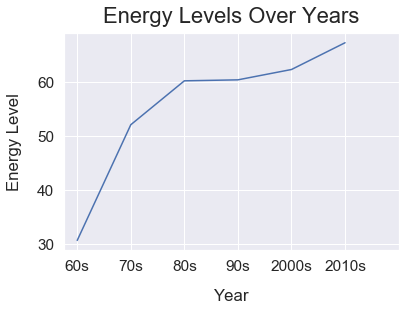

In [91]:
#Creating a line graph for year vs.  energy

summary_by_year.set_index('Year Size')['Energy'].plot();
plt.xlabel("Year", labelpad=15)
plt.ylabel("Energy Level", labelpad=15)
plt.title("Energy Levels Over Years", y=1.02, fontsize=22);
plt.xticks(np.arange(7), ('60s', '70s', '80s', '90s','2000s','2010s'));

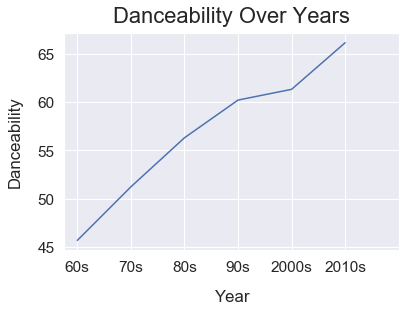

In [92]:
#Creating a line graph for year vs.  danceability

summary_by_year.set_index('Year Size')['Danceability'].plot();
plt.xlabel("Year", labelpad=15)
plt.ylabel("Danceability", labelpad=15)
plt.title("Danceability Over Years", y=1.02, fontsize=22);
plt.xticks(np.arange(7), ('60s', '70s', '80s', '90s','2000s','2010s'));

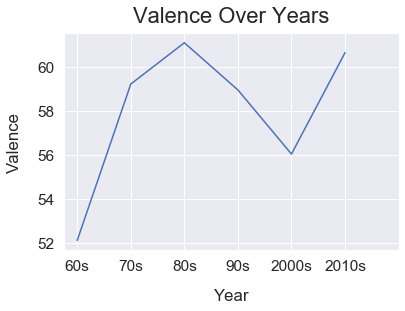

In [93]:
#Creating a line graph for year vs.  valence

summary_by_year.set_index('Year Size')['Valence'].plot();
plt.xlabel("Year", labelpad=15)
plt.ylabel("Valence", labelpad=15)
plt.title("Valence Over Years", y=1.02, fontsize=22);
plt.xticks(np.arange(7), ('60s', '70s', '80s', '90s','2000s','2010s'));

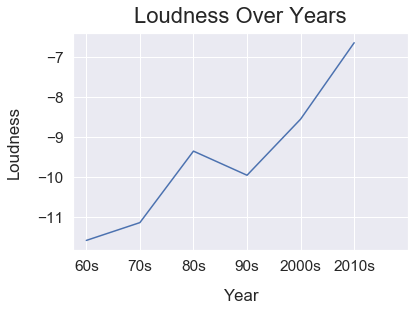

In [94]:
#Creating a line graph for year vs.  loudness

summary_by_year.set_index('Year Size')['Loudness'].plot();
plt.xlabel("Year", labelpad=15)
plt.ylabel("Loudness", labelpad=15)
plt.title("Loudness Over Years", y=1.02, fontsize=22);
plt.xticks(np.arange(7), ('60s', '70s', '80s', '90s','2000s','2010s'));